1. Find the total DSH payments each state receives in total in 2011 (aggregated from all hospitals for the state).

2. Find the numbers for year 2015.

3. Find how much DSH payments has increased in each state ((2) - (1)).
4. Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)
5. Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments (which makes sense since DSH payments covers uncompensated care caused by uninsured individuals, and under Medicaid expansion there should be fewer uninsured people in these states)

*repeat process for 2011 vs 2013 and compare results

In [1]:
#importing necessary libraries for data cleaning + analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading necessary csvs of dsh from years 2011, 2013, and 2015

dsh_2011 = pd.read_csv('dsh_2011.csv')
dsh_2013 = pd.read_csv('dsh_2013.csv')
dsh_2015 = pd.read_csv('dsh_2015.csv')

In [3]:
#grouped by state
#summed columns dsh1, dsh2, and dsh3

dsh_2011 = dsh_2011.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()
dsh_2013 = dsh_2013.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()
dsh_2015 = dsh_2015.groupby('state')['dsh1','dsh2','dsh3'].sum().reset_index()

#this option just formats the displays of floats cleaner
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
#created new column which takes the sum of dsh1, dsh2, dsh3

dsh_2011['dsh2011'] = dsh_2011['dsh1'] + dsh_2011['dsh2'] + dsh_2011['dsh3']
dsh_2013['dsh2013'] = dsh_2013['dsh1'] + dsh_2013['dsh2'] + dsh_2013['dsh3']
dsh_2015['dsh2015'] = dsh_2015['dsh1'] + dsh_2015['dsh2'] + dsh_2015['dsh3']

In [5]:
#drops other columns, and only keeps the sum column 

dsh_2011 = dsh_2011.drop(['dsh1','dsh2','dsh3'], axis=1)
dsh_2013 = dsh_2013.drop(['dsh1','dsh2','dsh3'], axis=1)
dsh_2015 = dsh_2015.drop(['dsh1','dsh2','dsh3'], axis=1)

In [6]:
#combine 2011 and 2013 data

dsh_all = pd.merge(dsh_2011, dsh_2013, on = ['state'])

In [7]:
#combine all data with 2015 data

dsh_all  = pd.merge(dsh_all, dsh_2015, on = ['state'])

Find how much DSH payments has increased in each state ((2) - (1)).

In [8]:
#take the percent change of 2015 and 2011

dsh_all['2015-2011'] = 1.0*(dsh_all['dsh2015'] - dsh_all['dsh2011'])/dsh_all['dsh2011']

In [9]:
#take the percent change of 2013 and 2011

dsh_all['2013-2011'] = 1.0*(dsh_all['dsh2013'] - dsh_all['dsh2011'])/dsh_all['dsh2011']

In [10]:
#remove white space in state

dsh_all['state'] = dsh_all['state'].str.strip()

Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)

In [11]:
#read in expansion states table to append column to previous df
expansion_states = pd.read_csv('expansion_states.csv')

In [12]:
#merging expansion status to previous data frame
dsh_states = pd.merge(dsh_all, expansion_states, on = ['state'], how = 'right')

In [13]:
dsh_states

,state,dsh2011,dsh2013,dsh2015,2015-2011,2013-2011,expansion_status
0,AK,17737577.00,23197983.00,8362462.00,-0.53,0.31,1
1,AL,186989459.00,134820950.00,44002542.00,-0.76,-0.28,0
2,AZ,176673419.00,105683970.00,56677289.00,-0.68,-0.40,1
3,DE,35418499.00,18458850.00,12426150.00,-0.65,-0.48,1
4,FL,785288570.00,618172065.00,194898300.00,-0.75,-0.21,0
5,GA,334648001.00,220655350.00,78336929.00,-0.77,-0.34,0
6,HI,24760182.00,13718233.00,7953117.00,-0.68,-0.45,1
7,ID,30481928.00,27935369.00,9160497.00,-0.70,-0.08,0
8,IN,203322799.00,155833731.00,67793103.00,-0.67,-0.23,1
9,KS,60133844.00,47245112.00,16420208.00,-0.73,-0.21,0


**2015-2011** Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 

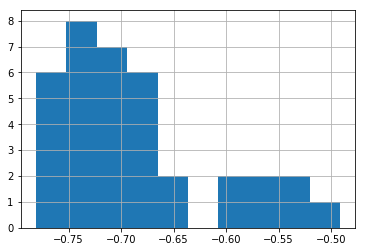

In [22]:
#graph difference in states

dsh_states['2015-2011'].hist()

In [17]:
#logistic regression stuff

from sklearn.linear_model import LogisticRegression

X = dsh_states[["2015-2011"]]
y = dsh_states["expansion_status"]

log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/kereeh/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

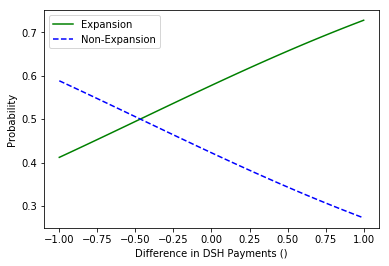

In [19]:
#plot

X_new = np.linspace(-1, 1, 100).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Expansion")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Non-Expansion")
plt.xlabel("Difference in DSH Payments ()")
plt.ylabel("Probability")
plt.legend()

In [21]:
# calculate the training prediction

pred = log_reg.predict(dsh_states[['2015-2011']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**2013 - 2011**
Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 